In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('used_car_data.csv')

# SOAL NO 1 - MERK MOBIL

In [7]:
Merek = []

for i in df["Name"]:
    Merek.append(i.split()[0])
    
df["Merek"] = Merek.copy()
df["Merek"].value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Ambassador          1
Smart               1
Lamborghini         1
Bentley             1
Isuzu               1
Name: Merek, dtype: int64

- <h3> Mengelompokkan Merek Mobil Bekas dengan Mobil yang Tersedia tiap Merek </h3>

In [8]:
df_group=df.groupby(['Merek','Name'])[['Location','Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage'\
                                 ,'Engine','Power','Seats','Price']].mean()


In [68]:
df_group

Year  Kilometers_Driven  \
Merek      Name                                                             
Ambassador Ambassador Classic Nova Diesel  2003.000000       80000.000000   
Audi       Audi A3 35 TDI Attraction       2014.000000       79271.000000   
           Audi A3 35 TDI Premium          2016.000000       20003.000000   
           Audi A3 35 TDI Premium Plus     2016.000000       39000.000000   
           Audi A3 35 TDI Technology       2017.000000       22000.000000   
...                                                ...                ...   
Volvo      Volvo XC60 D4 Summum            2012.000000       86000.000000   
           Volvo XC60 D5                   2012.333333      126658.666667   
           Volvo XC60 D5 Inscription       2014.000000       86925.000000   
           Volvo XC90 2007-2015 D5 AT AWD  2014.000000      102001.000000   
           Volvo XC90 2007-2015 D5 AWD     2014.000000       89230.000000   

                                           Seats      Price  
Merek      Name                                              
Ambassador Ambassador Classic Nova Diesel    5.0   1.350000  
Audi       Audi A3 35 TDI Attraction         5.0  16.500000  
           Audi A3 35 TDI Premium            5.0  19.250000  
           Audi A3 35 TDI Premium Plus       5.0  18.900000  
           Audi A3 35 TDI Technology         5.0  22.500000  
...                                          ...        ...  
Volvo      Volvo XC60 D4 Summum              5.0  18.250000  
           Volvo XC60 D5                     5.0  19.433333  
           Volvo XC60 D5 Inscription         5.0  17.180000  
           Volvo XC90 2007-2015 D5 AT AWD    7.0  23.580000  
           Volvo XC90 2007-2015 D5 AWD       7.0  23.650000  

[1876 rows x 4 columns]

# SOAL 2 - KOTA DENGAN MOBIL BEKAS PALING BANYAK

In [187]:
df['Location'].describe()

count       6019
unique        11
top       Mumbai
freq         790
Name: Location, dtype: object

# SOAL 3 - DISTRIBUSI TAHUN EDISI MOBIL BEKAS


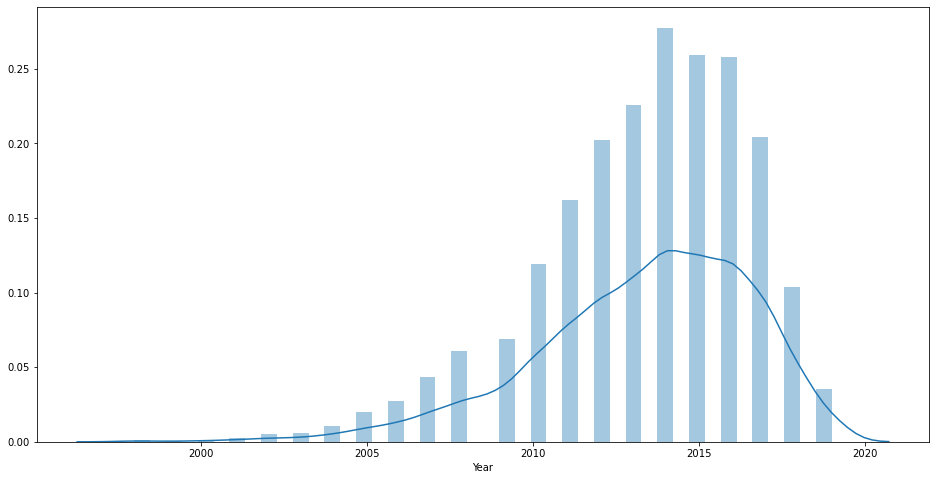

In [20]:
import matplotlib.pyplot as plt
import seaborn as sn

fig,ax = plt.subplots(figsize=(16,8))
sn.distplot(df['Year'],bins=44)

In [125]:
df['Year'].value_counts().count()

22

# SOAL 4 - MOBIL BEKAS DENGAN PEMAKAIAN < 100.000 KM

In [189]:
df[df['Kilometers_Driven'] < 100000]['Name'].count()

5470

# SOAL 5 - TOTAL JARAK PEMAKAIAN DIKATAKAN TINGGI/ RENDAH

In [9]:
df['Current Year'] = 2020
df['Age'] = df['Current Year'] - df['Year']
df = df.drop('Current Year',axis=1)

In [10]:
df['Jarak Pemakaian per Tahun'] = df['Kilometers_Driven']/df['Age']

In [9]:
# Low
df[df['Jarak Pemakaian per Tahun']<= 10000]['Jarak Pemakaian per Tahun'].count()

3882

In [413]:
# Normal
df[(df['Jarak Pemakaian per Tahun']>10000)&(df['Jarak Pemakaian per Tahun']<15000)]['Jarak Pemakaian per Tahun'].count() 

1379

In [414]:
# High
df[(df['Jarak Pemakaian per Tahun']>=15000)]['Jarak Pemakaian per Tahun'].count()

758

# SOAL 6 - OUTLIER PADA KOLOM Kilometers_Driven

- <h3> Deteksi Outlier dengan IQR </h3>

In [11]:
import numpy as np
q1, q3= np.percentile(df['Kilometers_Driven'],[25,75])
iqr = q3 - q1

In [12]:
lower_inner_fence = q1 -(1.5 * iqr) 
upper_inner_fence = q3 +(1.5 * iqr)         

In [19]:
len(df[df['Kilometers_Driven'] < lower_inner_fence]) # Data Outlier kurang dari Lower inner Fence

0

In [404]:
len(df[df['Kilometers_Driven'] > upper_inner_fence]) # Data Outlier lebih dari Upper inner Fence

202

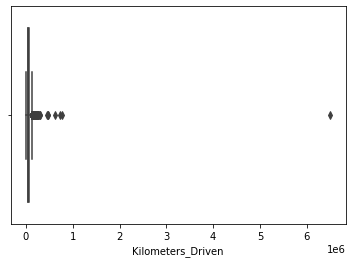

In [72]:
# Boxplot Kilometers_Driven
sn.boxplot(df['Kilometers_Driven'])

- <h3> Deteksi Outlier dengan Z-Score </h3>

In [13]:
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [74]:
detect_outlier(df['Kilometers_Driven'])

[775000, 620000, 720000, 6500000, 480000, 480000, 445000]

# SOAL 7 - PENGARUH TAHUN PEMBUATAN MOBIL(YEAR) DENGAN TOTAL JARAK PEMAKAIAN

Text(0.5, 1.0, 'HUBUNGAN ANTARA TAHUN PEMBUATAN MOBIL DENGAN TOTAL JARAK PEMAKAIAN')

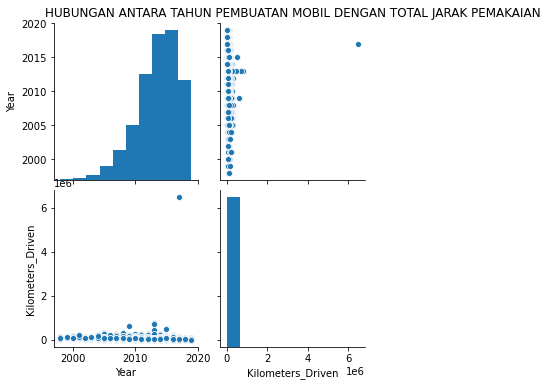

In [416]:
sn.pairplot(df[['Year','Kilometers_Driven']])
plt.title('HUBUNGAN ANTARA TAHUN PEMBUATAN MOBIL DENGAN TOTAL JARAK PEMAKAIAN')

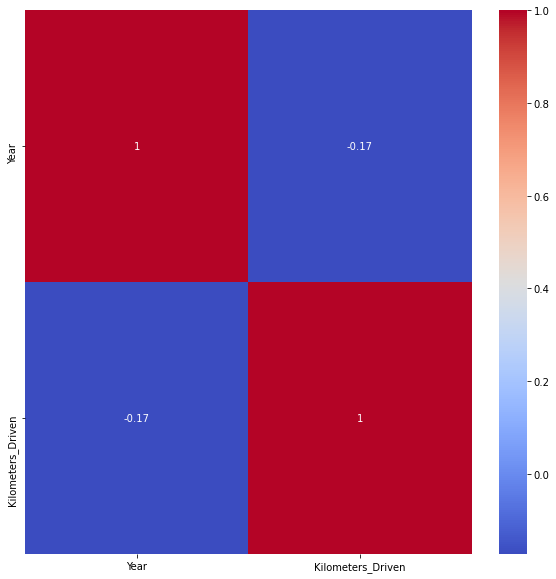

In [441]:
fig, ax = plt.subplots(figsize=(10,10))
corrmat = df[['Year','Kilometers_Driven']].corr(method='pearson')
top_corrmat = corrmat.index
g = sn.heatmap(df[top_corrmat].corr(method='pearson'),annot=True,cmap='coolwarm')

# SOAL 8 - MOBIL DENGAN KEPEMILIKAN KETIGA ATAU LEBIH


In [331]:
df[df["Owner_Type"].isin(["Third","Fourth & Above"])]["Name"].count()

122

# SOAL 9 - TIPE BAHAN BAKAR DENGAN MILEAGE PALING HEMAT

In [58]:
# Membuat variabel untuk mendapatkan indeks kolom Mileage(kmpl) 
indexNames = df[ df['Mileage(kmpl)'] == 0.0 ].index
# Drop dataframe kolom variabel indexNames
hubungan_mileage = df.drop(indexNames )

In [65]:
hubungan_bahan_bakar_mileage = hubungan_mileage.pivot_table(index='Fuel_Type', values='Mileage(kmpl)', aggfunc='mean')
hubungan_bahan_bakar_mileage

,Mileage(kmpl)
Fuel_Type,
CNG,25.418036
Diesel,18.778682
Electric,17.000000
LPG,19.385000
Petrol,17.679168


In [41]:
# Mencari mileage terendah dengan kmpl atau km/kg terendah
def sort(lst): 
    return sorted(lst, key = str) 
sort(df['Mileage'])

['0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '0.0 kmpl',
 '10.0 kmpl',
 '10.0 kmpl',
 '10.0 kmpl',
 '10.0 kmpl',
 '10.0 kmpl',
 '10.0 kmpl',
 '10.0 kmpl',
 '10.0 kmpl',
 '10

In [22]:
set(df[df['Mileage']=='10.0 kmpl']['Fuel_Type'])

{'Diesel', 'Petrol'}

# SOAL 10 - FAKTOR YANG MENENTUKAN HARGA MOBIL BEKAS

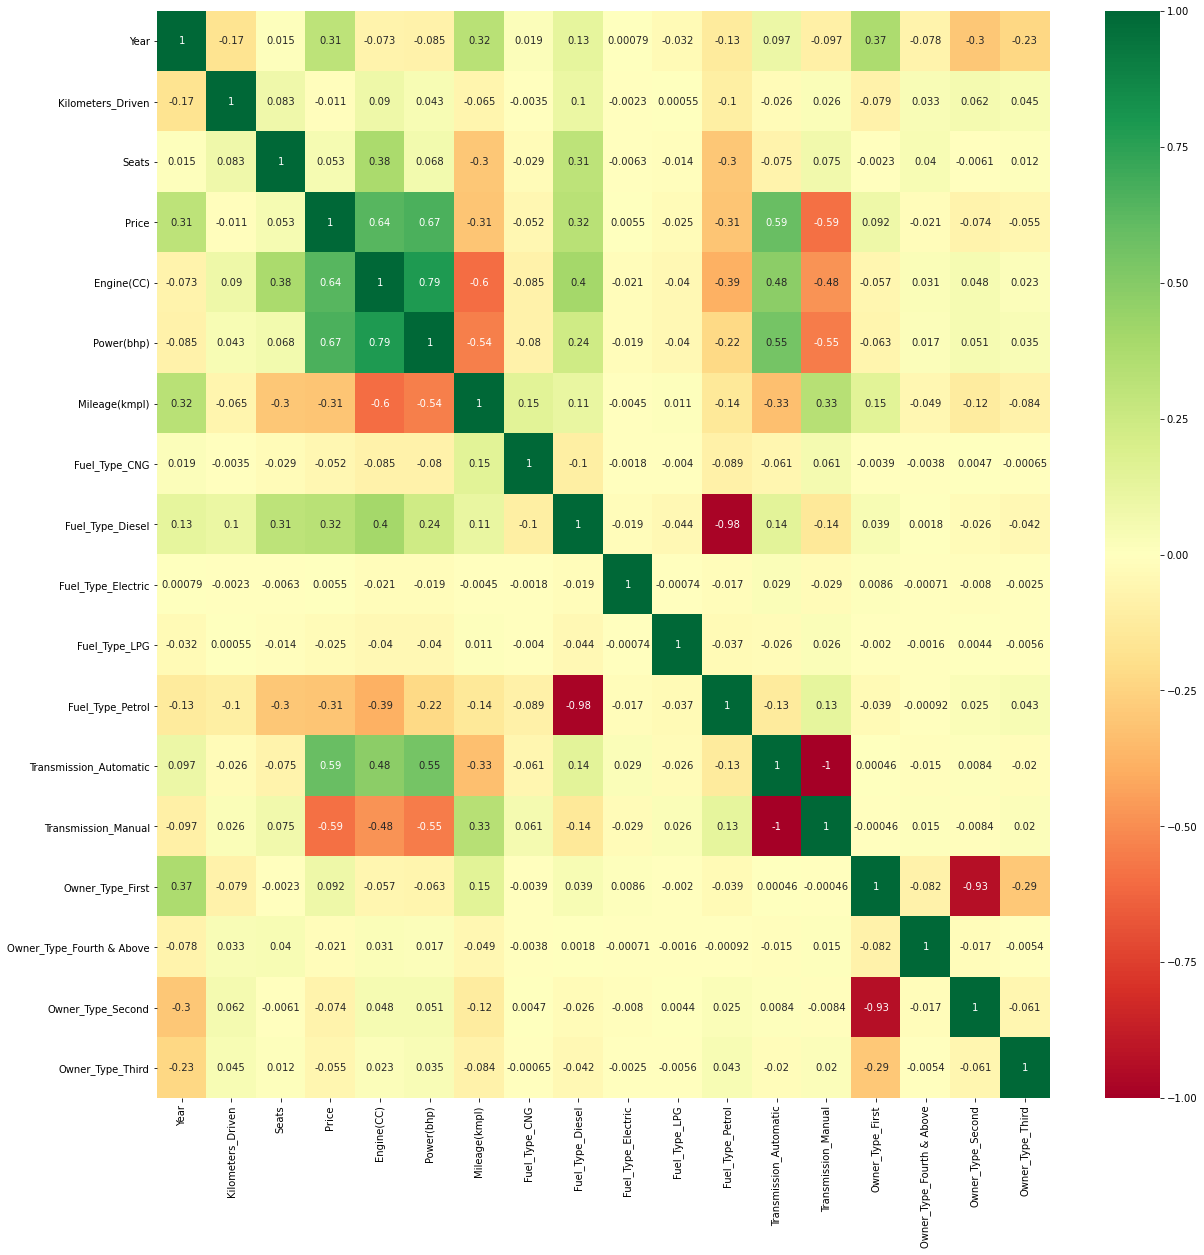

In [224]:
fig, ax = plt.subplots(figsize=(20,20))
corrmat = data_final.corr(method='pearson')
top_corrmat = corrmat.index
g = sn.heatmap(data_final[top_corrmat].corr(method='pearson'),annot=True,cmap='RdYlGn')

# EDA (EXPLORATORY DATA ANALYSIS) DAN FEATURE ENGINEERING 

- <h3> Mengidentifikasi banyaknya missing value tiap kolom </h3>

In [141]:
df.isnull().sum() 

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
Merek                 0
dtype: int64

In [142]:
# Melihat tipe data dari tiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
 12  Merek              6019 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


# Mengisi Missing Value

- <h3> Mengisi Missing Value Kolom Mileage (Frequent Category Imputation) </h3>

In [14]:
# Membuat Rumus Untuk mengisi dengan modus terbanyak
def impute_nan_frequent(df,variable):
    most_frequent_category = df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [15]:
# Mengisi Kolom Mileage dengan modus terbanyak
impute_nan_frequent(df,'Mileage')

In [16]:
# Memisahkan Data Kolom Mileage untuk diubah menjadi Numerik
Mileage = []

for i in df["Mileage"]:
    Mileage.append(i.split()[0])
    
df["Mileage"] = Mileage.copy()
df["Mileage"].value_counts()

17.0     175
18.9     172
18.6     119
20.36     88
21.1      87
        ... 
30.46      1
14.9       1
11.07      1
16.38      1
26.8       1
Name: Mileage, Length: 430, dtype: int64

In [18]:
# Mengubah tipe data object menjadi float
df['Mileage']=df['Mileage'].astype(float)

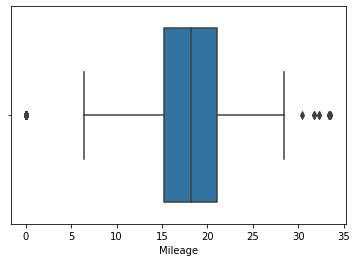

In [21]:
# Univariate analysis dari Kolom Mileage dengan BOXPLOT sesudah Imputasi
sn.boxplot('Mileage',data=df)

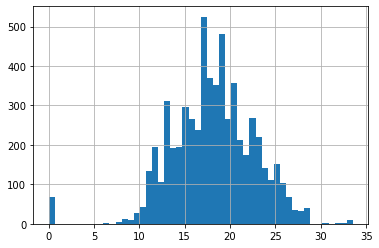

In [22]:
# Univariate analysis dari Kolom Mileage dengan Histogram sesudah Imputasi
df['Mileage'].hist(bins=50)

- <h3> Mengisi Missing Value Kolom Engine (End of Distribution) </h3>

In [23]:
# Mengisi data dengan random value yang tidak ada pada Kolom Engine
df['Engine'].fillna('0 CC',inplace=True)

In [24]:
# Memisahkan Data Kolom Engine untuk diubah menjadi Numerik
Engine = []

for i in df["Engine"]:
    Engine.append(i.split()[0])
    
df["Engine"] = Engine.copy()
df["Engine"].value_counts()

1197    606
1248    512
1498    304
998     259
2179    240
       ... 
4951      1
2720      1
2773      1
2706      1
3200      1
Name: Engine, Length: 147, dtype: int64

In [25]:
# Mengubah tipe data object menjadi integer
df['Engine'] = df['Engine'].astype(int)

In [26]:
# Mengganti random value sebelumnya dengan nan untuk Imputasi Data
df['Engine'] = df['Engine'].replace(0,np.nan)

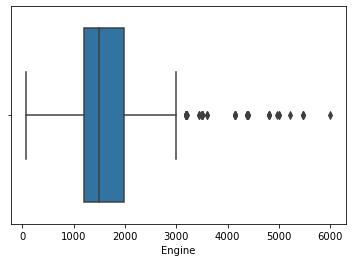

In [27]:
# Univariate analysis dari Kolom Engine dengan BOXPLOT sebelum imputasi
sn.boxplot('Engine',data=df)

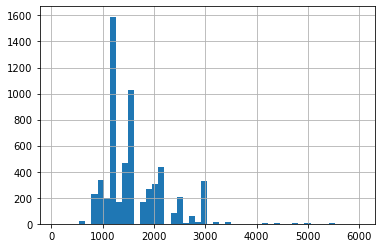

In [195]:
# Univariate analysis dari Kolom Engine dengan Histogram sebelum imputasi
df['Engine'].hist(bins=50)

In [28]:
# Membuat variabel nilai distribusi akhir dari kolom Engine
Engine_extreme = df.Engine.mean()+3*df.Engine.std()

In [29]:
# Membuat fungsi untuk mengisi missing value dengan metode end of Distribution
def impute_nan_end_distribution(df,variable,extreme):
    df[variable]= df[variable].fillna(extreme)


In [30]:
# Mengisi Kolom Engine dengan Engine_extreme
impute_nan_end_distribution(df,'Engine',Engine_extreme)

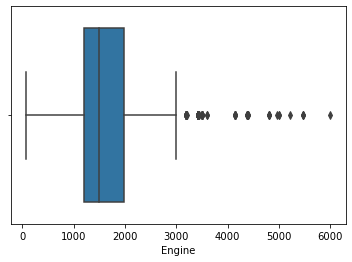

In [199]:
# Univariate analysis dari Kolom Engine dengan BOXPLOT sesudah imputasi
sn.boxplot('Engine',data=df)

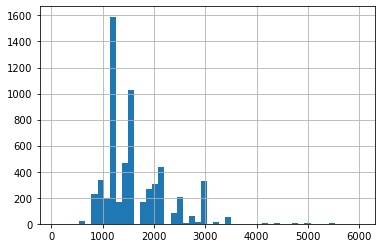

In [200]:
# Univariate analysis dari Kolom Engine dengan Histogram sesudah imputasi
df['Engine'].hist(bins=50)

- <h3> Mengisi Missing Value Kolom Power (End of Distribution) </h3>

In [31]:
# Mengisi data dengan random value yang tidak ada pada Kolom Power
df['Power'].fillna('0.0 bhp',inplace=True)

In [32]:
# Memisahkan Data Kolom Power untuk diubah menjadi Numerik
Power = []

for i in df["Power"]:
    Power.append(i.split()[0])
    
df["Power"] = Power.copy()
df["Power"].value_counts()

74        235
98.6      131
73.9      125
140       123
78.9      111
         ... 
175.67      1
181.43      1
112.4       1
402         1
130.3       1
Name: Power, Length: 373, dtype: int64

In [33]:
# Membuat string 'null' pada kolom Power menjadi 0
df.loc[df['Power']== 'null', 'Power'] = '0.0'

In [34]:
# Mengubah tipe data object menjadi float
df['Power'] = df['Power'].astype(float)

In [35]:
# Mengganti random value sebelumnya dengan nan untuk Imputasi Data
df['Power'] = df['Power'].replace(0,np.nan)

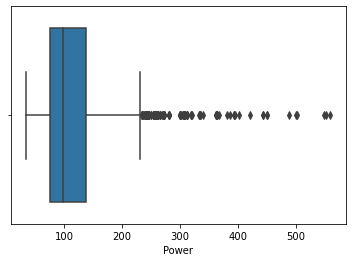

In [206]:
# Univariate analysis dari Kolom Power dengan BOXPLOT sebelum imputasi
sn.boxplot('Power',data=df)

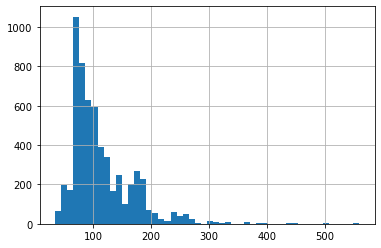

In [207]:
# Univariate analysis dari Kolom Power dengan BOXPLOT sebelum imputasi
df['Power'].hist(bins=50)

In [36]:
# Membuat variabel nilai distribusi akhir dari kolom Power
Power_extreme = df.Power.mean()+3*df.Power.std()

In [37]:
# Mengisi Kolom Power dengan Power_extreme
impute_nan_end_distribution(df,'Power',Power_extreme)

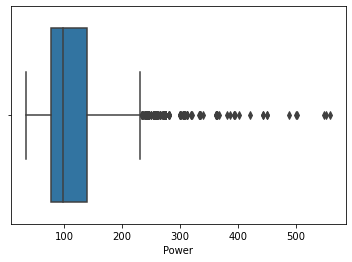

In [210]:
# Univariate analysis dari Kolom Power dengan BOXPLOT sesudah imputasi
sn.boxplot('Power',data=df)

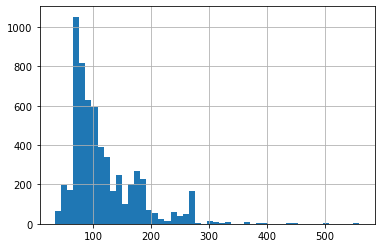

In [66]:
# Univariate analysis dari Kolom Power dengan Histogram sesudah imputasi
df['Power'].hist(bins=50)

- <h3> Mengisi Missing Value Kolom Seats (Frequent Category Imputation) </h3>

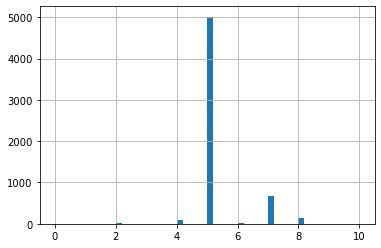

In [212]:
# Univariate analysis dari Kolom Seats dengan Histogram sebelum imputasi
df['Seats'].hist(bins=50)

In [38]:
# Mengisi Kolom Seats dengan modus terbanyak
impute_nan_frequent(df,'Seats')

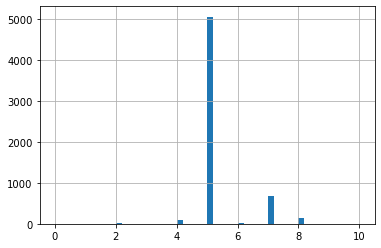

In [214]:
# Univariate analysis dari Kolom Seats dengan Histogram sesudah imputasi
df['Seats'].hist(bins=50)

In [39]:
# Mengganti Nama Kolom dengan Nama Kolom yang baru
df['Mileage(kmpl)'] = df['Mileage'].copy()
df['Engine(CC)'] = df['Engine'].copy()
df['Power(bhp)'] = df['Power'].copy()

In [40]:
# Mengubah data categorical pada kolom Fuel_Type, Transmission, dan Owner_Type menjadi numerik
data_numerik = pd.get_dummies(df, columns=["Fuel_Type",'Transmission','Owner_Type'])

In [42]:
# Membuat data Final dengan menghilangkan kolom yang tidak diperlukan
data_final = data_numerik.drop(['Merek','Age','Jarak Pemakaian per Tahun','Mileage','Engine','Power'],axis=1)

In [235]:
# Data Pencilan yang terlalu jauh dari batas atas dan bawah tiap kolom
lower_outer_fence = q1 -(3   * iqr)
upper_outer_fence = q3 +(3   * iqr)

In [137]:
df[df['Kilometers_Driven'] > 260000]['Kilometers_Driven'].value_counts()

480000     2
620000     1
445000     1
299322     1
775000     1
300000     1
6500000    1
282000     1
720000     1
262000     1
Name: Kilometers_Driven, dtype: int64

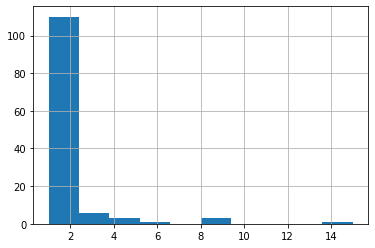

In [138]:
df[df['Kilometers_Driven'] > upper_inner_fence]['Kilometers_Driven'].value_counts().hist()

In [143]:
# Distribusi data kolom Owner_Type 
df['Owner_Type'].value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [144]:
# Distribusi data kolom Transmission
df.Transmission.value_counts()

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

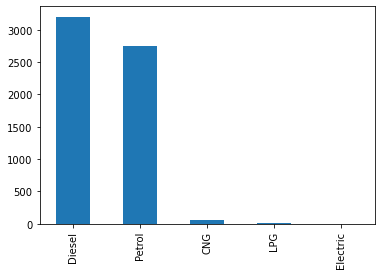

In [69]:
# Distribusi data kolom Fuel_Type 
df.Fuel_Type.value_counts().plot.bar()

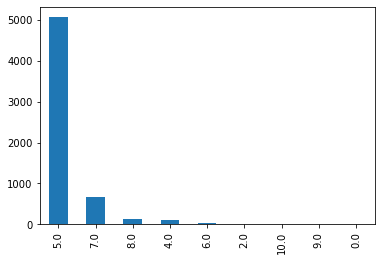

In [70]:
# Distribusi kolom Seats
df.Seats.value_counts().plot.bar()